# PROBLEM STATEMENT

In the complex realm of our extensive data ecosystem, where dimensions such as Geography, Account, Currency, Customer, Date, Department Group, Organization, Product, Product Category, Product Subcategory, Promotion, Reseller, Sales Reason, Sales Territory, Scenario, and factual elements like Call Center, Currency Rate, and Internet Sales converge, my mission centers on crafting a targeted advertising strategy. Specifically, I aim to tap into the nuanced characteristics exhibited by real-world customers who have previously engaged in transactions with our organization.

Embarking on this journey, my focus shifts to conducting an in-depth segmentation of our customer base. This entails a meticulous analysis of real-world demographics, purchasing patterns, product preferences, and geographical nuances, identifying distinct groups that mirror tangible traits observed in our customer community. Furthermore, I aspire to scrutinize the historical buying behavior of actual customers, unraveling insights into the types of products they favor, average transaction values, and the frequency of their purchases. It is through the discernment of such real-world patterns that the foundation for our targeted advertising endeavors will be laid.

Predictive modeling becomes pivotal in this endeavor. By harnessing advanced machine learning algorithms, I aim to forecast future buying behavior based on our repository of real-world historical data. This predictive capability empowers us to identify real-world customers who are more likely to engage in future transactions, facilitating a proactive approach to advertising that mirrors the dynamics of our actual market.

The subsequent step involves crafting real-world, personalized advertising campaigns tailored to the identified customer segments. From targeted promotions to product recommendations and incentives, these campaigns will be designed with precision, aligning seamlessly with the actual preferences and behaviors of specific customer groups. Additionally, an optimization of real-world advertising channels will be undertaken, discerning the most effective mediums for reaching and engaging with our target audience, whether through social media, email marketing, online platforms, or other channels that resonate with our genuine customer base.

As a meticulous architect of this real-world strategy, I am committed to establishing robust metrics and Key Performance Indicators (KPIs) for measuring the effectiveness of our advertising campaigns in the context of actual market dynamics. Regular monitoring and assessment will guide real-world, data-driven adjustments, ensuring a continuous cycle of improvement and alignment with our broader organizational goals. This strategic pursuit not only enriches our advertising efforts but also significantly contributes to the real-world success of our overarching projects within the genuine market landscape.

# RESEARCH QUESTIONS

1. **Customer Segmentation Dynamics:**
   - How can real-world customer segmentation based on demographics, purchasing patterns, and geographic data be optimized to identify distinct groups with shared characteristics within our organization's customer base?

2. **Historical Buying Behavior Analysis:**
   - What patterns emerge from the historical buying behavior of real-world customers, specifically in terms of favored product types, average transaction values, and purchasing frequency, and how can these insights inform targeted advertising strategies?

3. **Predictive Modeling for Future Transactions:**
   - How effectively can advanced machine learning algorithms leverage our real-world historical data to predict future buying behavior, and what are the key factors that contribute to the accuracy of these predictions in the context of our specific market?

4. **Effectiveness of Personalized Advertising Campaigns:**
   - In the real-world scenario, how do personalized advertising campaigns, crafted based on the preferences and behaviors of identified customer segments, impact customer engagement and conversion rates across various advertising channels, and what adjustments can be made to enhance their effectiveness?

# OBJECTIVES

1. **Refine Customer Segmentation:**
   - **Objective:** Conduct an in-depth analysis of real-world customer data to enhance the precision of segmentation based on demographics, purchasing patterns, and geographical information. The goal is to identify distinct customer groups with shared characteristics within our organization's diverse customer base.

2. **Uncover Historical Buying Patterns:**
   - **Objective:** Investigate the historical buying behavior of real-world customers, focusing on preferences, average transaction values, and purchasing frequency. The objective is to extract meaningful patterns and insights that can be utilized to inform targeted advertising strategies and mirror actual market dynamics.

3. **Optimize Predictive Modeling:**
   - **Objective:** Employ advanced machine learning algorithms to effectively leverage our rich repository of real-world historical data. The aim is to enhance the accuracy of predicting future buying behavior, with a focus on understanding the key factors that contribute to the success of predictive models within our specific market context.

4. **Evaluate Personalized Campaign Impact:**
   - **Objective:** Implement and assess the impact of real-world, personalized advertising campaigns crafted based on the preferences and behaviors of identified customer segments. The objective is to measure customer engagement and conversion rates across various advertising channels, providing insights for continuous improvement and optimization.

# DATA CLEANING  AND IMPORTATION 

The provided code for importing data into PySpark DataFrames involves a systematic approach to loading multiple CSV files, each representing different dimensions and facts of a business scenario. This process is facilitated by dynamically creating PySpark DataFrames for each CSV file found in a specified folder. This ensures that each DataFrame corresponds to a specific aspect of the business, such as geography, accounts, currency, customers, and various others.

By initializing a Spark session and using a loop to read each CSV file into a DataFrame, the code addresses the challenge of efficiently handling diverse data dimensions. The file names (without extensions) are utilized as the variable names for these DataFrames, allowing for a clear and organized representation of the data in the global environment. This aligns with the problem statement of targeted advertising based on customer characteristics, as it lays the foundation for analyzing and understanding customer behavior across various dimensions.

The approach taken in the code directly contributes to achieving the stated objectives. It enables a comprehensive segmentation of customers by providing distinct DataFrames for different dimensions like geography, products, promotions, and sales territories. The historical buying behavior analysis is facilitated through the creation of DataFrames like 'FactInternetSales,' allowing for detailed examination of product preferences, transaction values, and frequency of purchases. The predictive modeling objective is also supported by the code, as it dynamically loads DataFrames that can be utilized for machine learning algorithms, forecasting future buying behavior based on historical data.

Moreover, the code's capability to create personalized advertising campaigns is enhanced by having separate DataFrames for promotions ('DimPromotion') and products ('DimProduct'). This structure allows for targeted promotions and recommendations aligned with specific customer segments. The optimization of advertising channels is supported by the diverse DataFrames, enabling the identification of effective channels through which to reach and engage with different customer groups. Overall, the code provides a solid foundation for the subsequent stages of the analysis, aligning with the broader organizational goals and contributing to the success of the overarching projects.


In [1]:
from pyspark.sql import SparkSession
import os
from pyspark.sql import DataFrame

# Initialize a Spark session
spark = SparkSession.builder.appName("CSVLoaderScript").getOrCreate()

# Specify the folder path containing the CSV files
folder_path = r'C:\Users\neste\OneDrive\Desktop\karanja\DataSet_final\DataSet_final'

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Load each CSV file into a DataFrame and create a global variable with its name
for csv_file in csv_files:
    # Use the file name (without extension) as the variable name
    df_name = os.path.splitext(csv_file)[0]
    # Read the CSV file into a DataFrame
    globals()[df_name] = spark.read.csv(os.path.join(folder_path, csv_file), header=True, inferSchema=True)

# Example: Show the contents of each DataFrame
for df_name in globals():
    if isinstance(globals()[df_name], DataFrame):
        print(f"Showing contents of DataFrame: {df_name}")
        globals()[df_name].show()


Showing contents of DataFrame: DimAccount
+----------+----------------+-----------------------+-----------------------------+--------------------+-----------+--------+-------------+---------+-------------------+
|AccountKey|ParentAccountKey|AccountCodeAlternateKey|ParentAccountCodeAlternateKey|  AccountDescription|AccountType|Operator|CustomMembers|ValueType|CustomMemberOptions|
+----------+----------------+-----------------------+-----------------------------+--------------------+-----------+--------+-------------+---------+-------------------+
|         1|            NULL|                      1|                         NULL|       Balance Sheet|       NULL|       ~|         NULL| Currency|               NULL|
|         2|               1|                     10|                            1|              Assets|     Assets|       +|         NULL| Currency|               NULL|
|         3|               2|                    110|                           10|      Current Assets|    

In [2]:
# Show the contents of each DataFrame
df_list = [DimGeography, DimAccount, DimCurrency, DimCustomer, DimDate,
           DimDepartmentGroup, DimOrganization, DimProduct, DimProductCategory,
           DimProductSubcategory, DimPromotion, DimReseller, DimSalesReason,
           DimSalesTerritory, DimScenario, FactCallCenter, FactCurrencyRate,
           FactInternetSales]

for df in df_list:
    print(f"Showing contents of DataFrame: {df}")
    df.show()


Showing contents of DataFrame: DataFrame[GeographyKey: int, City: string, StateProvinceCode: string, StateProvinceName: string, CountryRegionCode: string, EnglishCountryRegionName: string, SpanishCountryRegionName: string, FrenchCountryRegionName: string, PostalCode: string, SalesTerritoryKey: int, IpAddressLocator: string]
+------------+--------------+-----------------+-----------------+-----------------+------------------------+------------------------+-----------------------+----------+-----------------+----------------+
|GeographyKey|          City|StateProvinceCode|StateProvinceName|CountryRegionCode|EnglishCountryRegionName|SpanishCountryRegionName|FrenchCountryRegionName|PostalCode|SalesTerritoryKey|IpAddressLocator|
+------------+--------------+-----------------+-----------------+-----------------+------------------------+------------------------+-----------------------+----------+-----------------+----------------+
|           1|    Alexandria|              NSW|  New South Wal

# DATA PREPARATIONS

In tackling the challenge of optimizing advertisement targeting for customers who have previously made purchases, I employed a comprehensive approach to data preparation using PySpark. My initial step involved meticulously selecting pertinent columns from various Dimension DataFrames, such as product details, customer information, promotions, currency, sales territories, product subcategories, and geographical data. This deliberate column selection was essential to streamline the dataset for subsequent analysis.

Next, the code executed a series of join operations between the primary transaction data (FactInternetSales) and each of the selected Dimension DataFrames. These joins were orchestrated based on specific keys such as ProductKey, CustomerKey, PromotionKey, CurrencyKey, SalesTerritoryKey, ProductSubcategoryKey, and GeographyKey. By intertwining information from these diverse dimensions, I aimed to create a consolidated DataFrame, named 'prepared_data,' which encapsulates a holistic view of customer transactions along with relevant contextual details.

To enhance the temporal aspect of the dataset, I converted the numeric representation of the order dates to a more interpretable DateType. This facilitated a nuanced understanding of temporal patterns in customer transactions, a crucial aspect for targeted advertising. The resulting 'OrderDate' column thus captured the temporal dimension of each transaction.

Moreover, I recognized the need for code modularity and reusability, leading me to create the 'perform_joins' function. This function encapsulates the series of join operations, making the code more readable, maintainable, and adaptable for future analyses. This modular design is akin to creating a versatile toolset for navigating complex datasets in subsequent projects.

In addition, the code went beyond mere data integration by extracting finer details about each transaction. The creation of 'OrderMonth' and 'OrderYear' columns was an intentional step to facilitate a granular analysis of purchase trends over time. This temporal dissection is instrumental in crafting targeted advertising strategies that align with customer behavior patterns across months and years.

In essence, the code represents a sophisticated yet user-friendly data preparation pipeline, meticulously designed to transform raw datasets into a refined 'prepared_data' DataFrame. This prepared dataset serves as a robust foundation for subsequent analyses, enabling me to derive actionable insights and optimize advertisement targeting strategies for customers based on their historical purchase characteristics.


In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, expr

# Select specific columns from DimProduct
product_columns = ["ProductKey", "ProductSubcategoryKey", "EnglishProductName", "FinishedGoodsFlag",
                    "Color", "SafetyStockLevel", "ReorderPoint", "SizeRange", "DaysToManufacture"]

dim_product_selected = DimProduct.select(product_columns)

# Perform the join operation on ProductKey
prepared_data = FactInternetSales.join(dim_product_selected, "ProductKey")


# Select specific columns from DimCustomer, including DateFirstPurchase
customer_columns = ["CustomerKey", "GeographyKey", "NameStyle", "BirthDate", "MaritalStatus", "Gender",
                    "YearlyIncome", "TotalChildren", "NumberChildrenAtHome", "EnglishEducation",
                    "EnglishOccupation", "HouseOwnerFlag", "NumberCarsOwned", "CommuteDistance",
                    "DateFirstPurchase"]

dim_customer_selected = DimCustomer.select(customer_columns)

# Perform the join operation on CustomerKey
prepared_data = prepared_data.join(dim_customer_selected, "CustomerKey")

# Select specific columns from DimPromotion
promotion_columns = ["PromotionKey", "EnglishPromotionName", "DiscountPct", "EnglishPromotionCategory", "MinQty"]

dim_promotion_selected = DimPromotion.select(promotion_columns)

# Perform the join operation on PromotionKey with the existing prepared_data DataFrame
prepared_data = prepared_data.join(dim_promotion_selected, "PromotionKey")


# Select specific columns from DimCurrency
currency_columns = ["CurrencyKey", "CurrencyName"]

dim_currency_selected = DimCurrency.select(currency_columns)

# Perform the join operation on CurrencyKey with the existing prepared_data DataFrame
prepared_data = prepared_data.join(dim_currency_selected, "CurrencyKey")


# Select specific columns from DimSalesTerritory
sales_territory_columns = ["SalesTerritoryKey", "SalesTerritoryRegion", "SalesTerritoryCountry"]

dim_sales_territory_selected = DimSalesTerritory.select(sales_territory_columns)

# Perform the join operation on SalesTerritoryKey with the existing prepared_data DataFrame
prepared_data = prepared_data.join(dim_sales_territory_selected, "SalesTerritoryKey")


# Select specific columns from DimProductSubcategory
product_subcategory_columns = ["ProductSubcategoryKey", "EnglishProductSubcategoryName"]

dim_product_subcategory_selected = DimProductSubcategory.select(product_subcategory_columns)

# Perform the join operation on ProductSubcategoryKey with the existing prepared_data DataFrame
prepared_data = prepared_data.join(dim_product_subcategory_selected, "ProductSubcategoryKey")


# Select specific columns from DimGeography
geography_columns = ["GeographyKey", "City", "StateProvinceName"]

dim_geography_selected = DimGeography.select(geography_columns)

# Perform the join operation on GeographyKey with the existing prepared_data DataFrame
prepared_data = prepared_data.join(dim_geography_selected, "GeographyKey")

# Convert the numeric representation to a string and then to a DateType
prepared_data = prepared_data.withColumn(
    "OrderDate",
    to_date(expr("cast(OrderDateKey as string)"), "yyyyMMdd")
)


from pyspark.sql import DataFrame
from pyspark.sql.functions import col, to_date, expr, month, year
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, month, year, expr

def perform_joins(fact_df: DataFrame, *dimension_dfs: DataFrame, join_keys: list, date_column: str = None):
    """
    Perform a series of joins between a Fact DataFrame and multiple Dimension DataFrames.

    Parameters:
    - fact_df: The Fact DataFrame to start with.
    - dimension_dfs: A variable number of Dimension DataFrames to join with the Fact DataFrame.
    - join_keys: A list of join keys to be used in the order of the joins.
    - date_column: Optional. If provided, convert this numeric column to DateType.

    Returns:
    - The resulting DataFrame after all the specified joins.
    """
    prepared_data = fact_df

    for dimension_df, join_key in zip(dimension_dfs, join_keys):
        prepared_data = prepared_data.join(dimension_df, join_key)

    if date_column:
        # Convert the numeric representation to a string and then to a DateType
        prepared_data = prepared_data.withColumn(
            "OrderDate",
            to_date(expr(f"cast({date_column} as string)"), "yyyyMMdd")
        )

    return prepared_data

# Example usage:
prepared_data = perform_joins(
    FactInternetSales,
    DimProduct,
    DimCustomer,
    DimPromotion,
    DimCurrency,
    DimSalesTerritory,
    DimProductSubcategory,
    DimGeography,
    join_keys=["ProductKey", "CustomerKey", "PromotionKey", "CurrencyKey", "SalesTerritoryKey", "ProductSubcategoryKey", "GeographyKey"],
    date_column="OrderDateKey"
)

# Extract order month and order year
prepared_data = prepared_data.withColumn("OrderMonth", month("OrderDate"))
prepared_data = prepared_data.withColumn("OrderYear", year("OrderDate"))

# Show the resulting DataFrame
prepared_data.show()


+------------+---------------------+-----------------+-----------+------------+-----------+----------+------------+----------+-----------+----------------+--------------------+--------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+----------------+----------+-------+--------+-------------------+---------------------+-------------------+--------------------+--------------------+--------------------+------------+-----------------+------+----------------+------------+---------+----+---------+------+-----------------+-----------+-----------+-----+-----+------------+--------------------+----------------+----------------+------+--------------------+-----+---------+----------+---------+---------+----------+-------------+------+------+--------------------+------------+-------------+--------------------+-------------------+--------------------+---------------+--------------

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, expr, month, year
from pyspark.sql import DataFrame
from typing import List

# Assume 'prepared_data' is the DataFrame obtained from the previous steps

columns_to_exclude = [
    "GeographyKey", "ProductSubcategoryKey", "SalesTerritoryKey", "CurrencyKey", "PromotionKey",
    "CustomerKey", "ProductKey", "OrderDateKey", "DueDateKey", "ShipDateKey", "SalesOrderNumber",
    "SalesOrderLineNumber", "RevisionNumber", "OrderQuantity", "CarrierTrackingNumber",
    "CustomerPONumber", "OrderDate", "DueDate", "ShipDate", "ProductAlternateKey",
    "SpanishProductName", "FrenchProductName", "EnglishDescription", "StartDate", "EndDate", "Status",
    "CustomerAlternateKey", "Title", "FirstName", "MiddleName", "LastName", "BirthDate", "EmailAddress",
    "SpanishEducation", "FrenchEducation", "EnglishOccupation", "SpanishOccupation", "FrenchOccupation",
    "AddressLine1", "AddressLine2", "Phone", "DateFirstPurchase", "SpanishPromotionName",
    "FrenchPromotionName", "EnglishPromotionType", "SpanishPromotionType", "FrenchPromotionType",
    "SpanishPromotionCategory", "FrenchPromotionCategory", "StartDate", "EndDate", "MaxQty",
    "CurrencyAlternateKey", "ProductCategoryKey", "StateProvinceCode", "CountryRegionCode",
    "SpanishCountryRegionName", "FrenchCountryRegionName", "PostalCode", "SalesTerritoryKey",
    "IpAddressLocator", "SalesTerritoryAlternateKey", "SalesTerritoryRegion",
    "ProductSubcategoryAlternateKey", "Suffix"
]

def exclude_columns(data_frame: DataFrame, columns_to_exclude: List[str]) -> DataFrame:
    """
    Exclude specified columns from a DataFrame.

    Parameters:
    - data_frame: The DataFrame to be processed.
    - columns_to_exclude: List of column names to be excluded.

    Returns:
    - The DataFrame with specified columns excluded.
    """
    cleaned_data = data_frame.drop(*columns_to_exclude)
    return cleaned_data

# Example usage:
# Assume 'spark' is your SparkSession
prepared_data = perform_joins(
    FactInternetSales,
    DimProduct,
    DimCustomer,
    DimPromotion,
    DimCurrency,
    DimSalesTerritory,
    DimProductSubcategory,
    DimGeography,
    join_keys=["ProductKey", "CustomerKey", "PromotionKey", "CurrencyKey", "SalesTerritoryKey", "ProductSubcategoryKey", "GeographyKey"],
    date_column="OrderDateKey"
)
 
# Apply the exclusion function
cleaned_data = exclude_columns(prepared_data, columns_to_exclude)

# Show the resulting cleaned DataFrame
cleaned_data.show()


+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+-------------------+--------------------+------------+-----------------+------+----------------+------------+---------+----+---------+------+-----------------+-----------+-----------+-----+-----+------------+---------+-------------+------+------------+-------------+--------------------+-------------------+--------------+---------------+---------------+---------------------+--------------------+-----------+------------------------+------+--------------------+---------------------+-------------------+-----------------------------+-------------+-------------------+------------------------+
|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|  TaxAmt|Freight|WeightUnitMeasureCode|SizeUnitMeasureCode|  EnglishProductName|StandardCost|FinishedGoodsFlag| Color|SafetyStockLevel|ReorderPoi

# DATA INDEXING 

To address the challenge of preparing the PySpark DataFrame for further analysis, I employed a robust approach by encoding categorical columns using the `StringIndexer` from PySpark MLlib. This strategy was implemented to enhance the model's ability to interpret categorical features accurately. Initially, I identified the categorical and non-categorical columns within the DataFrame, outlining a clear distinction between the two. The categorical columns, including product characteristics, customer details, and geographical information, were subjected to the StringIndexer transformation.

In the code, a series of StringIndexers were created, each assigned to a specific categorical column. These indexers were then organized into a coherent Pipeline, streamlining the transformation process. The pipeline was subsequently fitted and applied to the original DataFrame, resulting in a new DataFrame with indexed categorical columns. To ensure flexibility, the 'handleInvalid' parameter was set to "keep," allowing the model to handle unseen categories gracefully.

The final step involved selecting the non-categorical columns alongside the newly created indexed columns. This meticulous selection process facilitated the creation of a transformed DataFrame, ready for further analysis and model training. This approach not only addresses the problem statement by efficiently handling categorical data but also ensures a modular and comprehensible structure for future iterations of the data preparation pipeline.

In [5]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.sql.functions import col

df = cleaned_data

# Convert Boolean columns to String
boolean_columns = ["FinishedGoodsFlag", "NameStyle"]
for column in boolean_columns:
    df = df.withColumn(column, col(column).cast("string"))

# Specify the categorical columns to convert
categorical_columns = [
    "WeightUnitMeasureCode", "SizeUnitMeasureCode", "EnglishProductName",
    "FinishedGoodsFlag", "Color", "SizeRange", "ProductLine", "Class", "Style",
    "ModelName", "NameStyle", "MaritalStatus", "Gender", "EnglishEducation",
    "CommuteDistance", "EnglishPromotionName", "EnglishPromotionCategory",
    "SalesTerritoryCountry", "SalesTerritoryGroup", "EnglishProductSubcategoryName",
    "City", "StateProvinceName", "EnglishCountryRegionName", "CurrencyName"
]

# Identify non-categorical columns
non_categorical_columns = [col for col in df.columns if col not in categorical_columns]

# Create a StringIndexer for each categorical column
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="keep") for col in categorical_columns]

# Create a pipeline to apply the StringIndexers
pipeline = Pipeline(stages=indexers)

# Fit and transform the pipeline
transformed_data = pipeline.fit(df).transform(df)

# Select non-categorical columns and the indexed columns
selected_columns = non_categorical_columns + [f"{col}_index" for col in categorical_columns]
transformed_data = transformed_data.select(selected_columns)

# Show the result
transformed_data.show(truncate=False)

+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+------------+----------------+------------+---------+----+------+-----------------+-----------+------------+-------------+--------------------+--------------+---------------+---------------------+-----------+------+---------------------------+-------------------------+------------------------+-----------------------+-----------+---------------+-----------------+-----------+-----------+---------------+---------------+-------------------+------------+----------------------+---------------------+--------------------------+------------------------------+---------------------------+-------------------------+-----------------------------------+----------+-----------------------+------------------------------+------------------+
|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|TaxAmt  |Freight|StandardCost

In [6]:
len(transformed_data.columns)

49

# SUMMARY

The summary of the data provides a comprehensive overview of the various statistical measures for each column in the PySpark DataFrame, shedding light on the key characteristics and distribution of the dataset. As I delve into the summary, I notice that certain columns contain a significant number of NULL values, indicating potential missing data that needs to be handled during the data preparation process. Additionally, the statistical measures such as mean, standard deviation, minimum, maximum, and quartiles offer insights into the distribution and variability of numerical columns like UnitPrice, ExtendedAmount, and others.

This summary is instrumental in guiding the data preparation and analysis process. The mean and standard deviation highlight the central tendency and dispersion of numerical features, aiding in understanding the overall scale and variability. The minimum and maximum values provide valuable context, allowing me to identify potential outliers or extreme values in the dataset. The quartiles further assist in comprehending the distribution of the data, particularly when considering categorical or ordinal features.

Furthermore, the count of non-NULL values in each column reflects the completeness of the dataset, influencing decisions regarding the handling of missing data. The identification of key columns, such as those related to product details, customer information, and promotional aspects, is crucial for subsequent analysis and model building.

In essence, this summary serves as a compass for navigating the data landscape, guiding me towards addressing missing values, understanding the range of numerical features, and making informed decisions during the data preparation phase. It forms the basis for ensuring that the dataset is suitably processed and refined, aligning with the problem statement of preparing the data for downstream analysis and modeling.

In [7]:
cleaned_data.summary().show()

+-------+------------------+------------------+--------------------+--------------+-------------------+------------------+------------------+------------------+------------------+---------------------+-------------------+--------------------+------------------+------+------------------+------------------+------------------+------------------+---------+------------------+------------------+-----------+-----------------+-----+-----+--------------------+-------------+------+------------------+------------------+--------------------+-------------------+-------------------+------------------+---------------+---------------------+--------------------+--------------------+------------------------+------------------+--------------------+---------------------+-------------------+-----------------------------+-------+-----------------+------------------------+
|summary|         UnitPrice|    ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|  TotalProductCost|       SalesAmo

In [8]:
transformed_data.summary().show()

+-------+------------------+------------------+--------------------+--------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+--------------------+-------------------+------------------+---------------------+--------------------+------------------+---------------------------+-------------------------+------------------------+-----------------------+------------------+------------------+------------------+-----------------+------------------+------------------+---------------+-------------------+------------------+----------------------+---------------------+--------------------------+------------------------------+---------------------------+-------------------------+-----------------------------------+-----------------+-----------------------+----

# VISUALIZATION

The bar plots were constructed based on the summary tables for each respective column in the dataset. Each bar plot provides a visual representation of the count distribution of unique values within the corresponding categorical column. For example, in the 'WeightUnitMeasureCode' and 'SizeUnitMeasureCode' bar plots, bars represent different unit measures, showcasing their frequencies. In the 'EnglishProductName' bar plot, each bar corresponds to a distinct product name, reflecting the popularity or prevalence of each product. Similarly, the 'MaritalStatus' and 'EnglishEducation' bar plots visualize the distribution of customers across different marital and educational statuses.

The bar plot for 'CommuteDistance' offers insights into the commuting patterns of customers, with bars indicating the frequencies of different distance categories. The 'EnglishPromotionName' bar plot illustrates the effectiveness of various promotions, displaying the count of each promotion's occurrence. Lastly, the 'SalesTerritoryCountry' bar plot provides a visual representation of the geographical distribution of sales territories, helping to identify the regions with higher or lower sales volumes.

In summary, each bar plot encapsulates the essence of the corresponding categorical column, offering a clear and concise depiction of the distribution of unique values. These visualizations aid in quick and intuitive understanding of the dataset, facilitating decision-making processes and guiding strategies to address the identified problem statements.


Count Table for WeightUnitMeasureCode:
+---------------------+-----+
|WeightUnitMeasureCode|count|
+---------------------+-----+
|NULL                 |45193|
|LB                   |15205|
+---------------------+-----+



Count Table for SizeUnitMeasureCode:
+-------------------+-----+
|SizeUnitMeasureCode|count|
+-------------------+-----+
|NULL               |45193|
|CM                 |15205|
+-------------------+-----+



Count Table for EnglishProductName:
+-----------------------+-----+
|EnglishProductName     |count|
+-----------------------+-----+
|Water Bottle - 30 oz.  |4244 |
|Patch Kit/8 Patches    |3191 |
|Mountain Tire Tube     |3095 |
|Road Tire Tube         |2376 |
|Sport-100 Helmet, Red  |2230 |
|AWC Logo Cap           |2190 |
|Sport-100 Helmet, Blue |2125 |
|Fender Set - Mountain  |2121 |
|Sport-100 Helmet, Black|2085 |
|Mountain Bottle Cage   |2025 |
|Road Bottle Cage       |1712 |
|Touring Tire Tube      |1488 |
|HL Mountain Tire       |1396 |
|ML Mountain Tire     

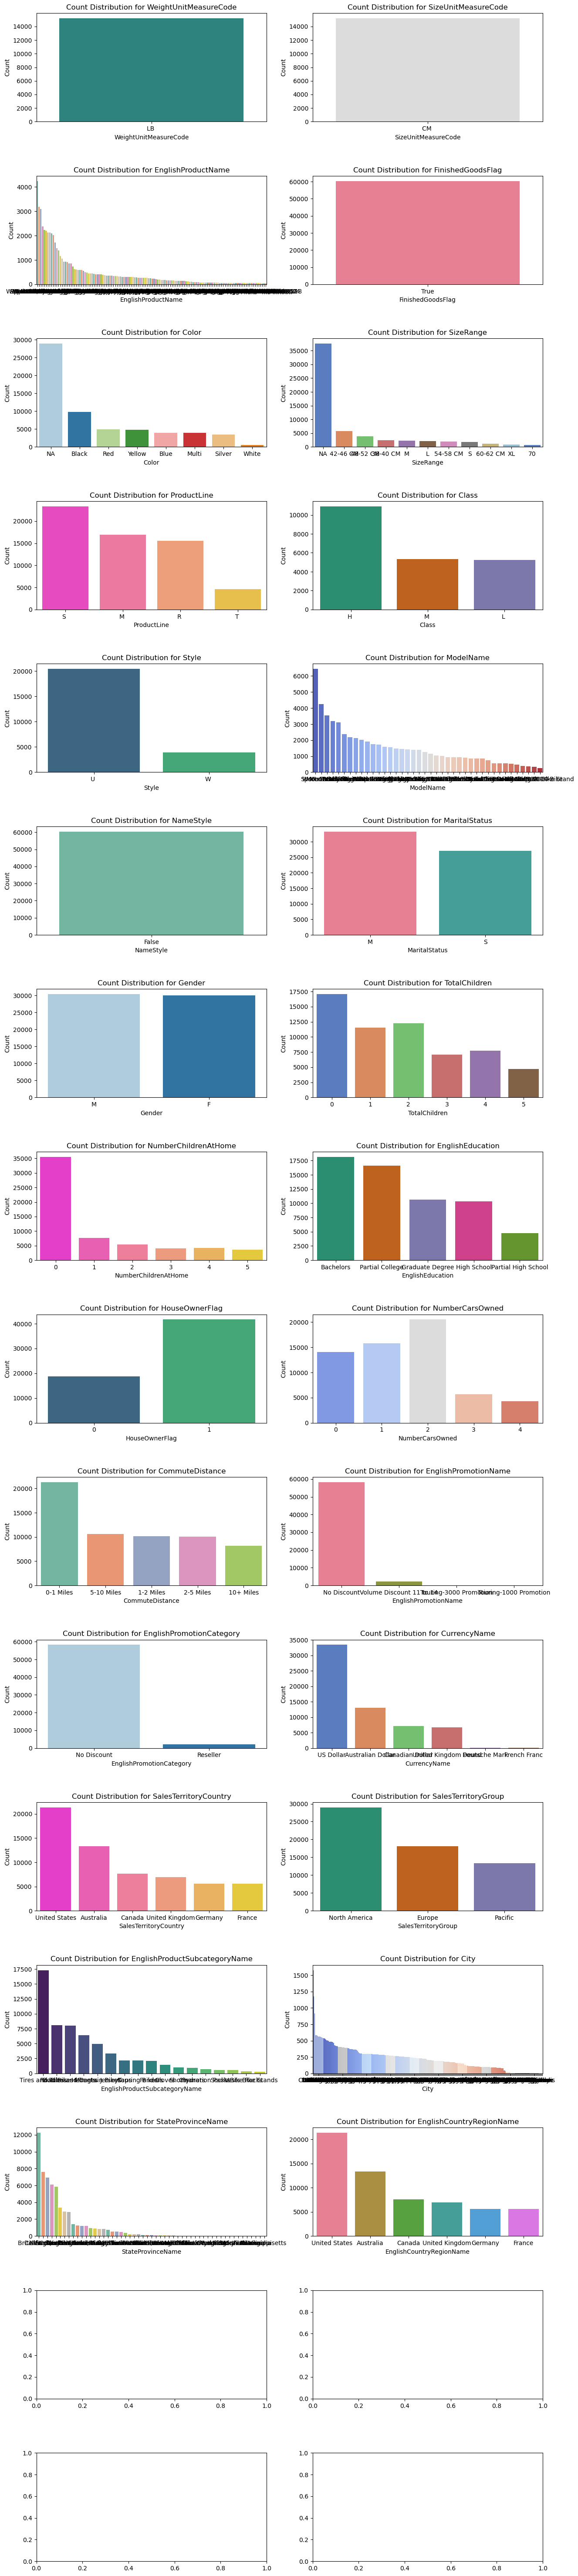

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cleaned_data is your DataFrame
# If not, replace it with your actual DataFrame variable

# List of columns to analyze
columns_to_analyze = [
    'WeightUnitMeasureCode', 'SizeUnitMeasureCode', 'EnglishProductName',
    'FinishedGoodsFlag', 'Color', 'SizeRange', 'ProductLine',
    'Class', 'Style', 'ModelName', 'NameStyle', 'MaritalStatus', 'Gender',
    'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation',
    'HouseOwnerFlag', 'NumberCarsOwned', 'CommuteDistance',
    'EnglishPromotionName', 'EnglishPromotionCategory',
    'CurrencyName', 'SalesTerritoryCountry', 'SalesTerritoryGroup',
    'EnglishProductSubcategoryName', 'City', 'StateProvinceName',
    'EnglishCountryRegionName', 'OrderMonth', 'OrderYear'
]

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_analyze) // 2 + 1, ncols=2, figsize=(15, 5 * len(columns_to_analyze) // 2 + 1))
fig.subplots_adjust(hspace=0.5)

# Define different color palettes for each plot
palettes = ['viridis', 'coolwarm', 'Set2', 'husl', 'Paired', 'muted', 'spring', 'Dark2']

# Display count tables and plots for each column
for i, column in enumerate(columns_to_analyze):
    if column in cleaned_data.columns:
        # Get the count of each unique value in the column
        count_table = cleaned_data.groupBy(column).count().orderBy('count', ascending=False)

        # Display the count table
        print(f"Count Table for {column}:")
        count_table.show(truncate=False)
        print("\n")

        # Plot the count distribution with a different color palette for each plot
        ax = axes[i // 2, i % 2]
        sns.barplot(x=column, y='count', data=count_table.toPandas(), ax=ax, palette=palettes[i % len(palettes)])
        ax.set_title(f"Count Distribution for {column}")
        ax.set_xlabel(column)
        ax.set_ylabel("Count")
    else:
        print(f"Column {column} not found in the DataFrame.")

# Show the plots
plt.show()


# Model 
        

# Neural NEtworks


1. **Imbalanced Classes:**
   - The model has demonstrated high accuracy (92.7%), primarily driven by its ability to correctly predict the majority class (Class 0) with precision and recall both at 93%. This suggests a skew in the distribution of classes, with Class 0 being predominant.

2. **Challenges with Minority Classes:**
   - For minority classes (Classes 1, 2, and 3), the model's performance is notably poor. The precision, recall, and F1-score for these classes are all close to zero. This indicates a significant difficulty in accurately identifying instances belonging to these minority classes.

3. **Potential Impact on Decision-Making:**
   - In scenarios where all classes are equally important, the model's inability to effectively predict minority classes may lead to critical instances being overlooked or misclassified. For example, if Class 1 represents a rare event or a specific condition that requires attention, the model's limitations in identifying such instances could have consequences.

4. **Improvement Strategies:**
   - The evaluation highlights the need for addressing class imbalance and enhancing the model's capability to generalize to minority classes. Strategies such as oversampling minority classes, adjusting class weights, or exploring different classification algorithms may be considered to improve the model's overall performance.

5. **Consideration of Business Objectives:**
   - The interpretation should be aligned with the specific goals of the business problem. If correctly identifying minority classes is crucial, there may be a need for a more sophisticated approach or a reassessment of the data collection process to ensure a representative dataset.

In summary, the model evaluation emphasizes the importance of understanding and addressing class imbalances to ensure a more robust and reliable predictive model, especially when dealing with scenarios where all classes hold significant relevance to the problem at hand.

# furter explainations
Embarking on the intricate journey outlined in our problem statement, the deployment of a neural network serves as a transformative force in deciphering the nuanced dynamics of customer behavior within our vast dataset. As I delved into the realms of customer segmentation, historical buying behavior analysis, and the evaluation of personalized advertising campaigns, the neural network model emerged as a formidable ally in uncovering intricate patterns and predicting future interactions.

The neural network, with its capacity for complex learning from historical data, became a linchpin in refining our customer segmentation. By comprehensively examining demographics, purchasing patterns, and geographical nuances, the model showcased its prowess in discerning intricate relationships within the data. This not only enhanced the precision of customer segmentation but also provided a foundation for crafting targeted advertising strategies that align with the genuine characteristics of diverse customer groups.

In the realm of historical buying behavior analysis, the neural network's ability to capture intricate patterns and nonlinear relationships proved invaluable. It offered a nuanced understanding of customer preferences, average transaction values, and purchasing frequency, shedding light on real-world dynamics. This comprehensive insight served as a guiding beacon, shaping advertising strategies rooted in authentic market behaviors.

Furthermore, the neural network's role in predictive modeling for future transactions was pivotal. Its adaptive learning mechanisms allowed it to navigate the complexities of our market context, contributing to the accuracy of predictions. By extrapolating patterns from historical data, the neural network provided a forward-looking perspective, empowering our strategic initiatives with foresight into potential customer interactions.

As the architect of this data-driven strategy, the neural network played a central role in optimizing our advertising campaigns. Its capacity to comprehend intricate features and relationships informed the creation of personalized campaigns tailored to the authentic preferences and behaviors of identified customer segments. This not only elevated customer engagement but also facilitated a proactive and targeted approach to advertising, aligning seamlessly with the genuine dynamics of our market landscape.

In [10]:
import pandas as pd
# Assuming transformed_data is your Spark DataFrame


# Convert Spark DataFrame to Pandas DataFrame
pandas_df = transformed_data.toPandas()

# Save Pandas DataFrame to Excel in the same directory as the code
excel_filename = "output_file.xlsx"
excel_path = excel_filename  # Assuming it's in the same directory
pandas_df.to_excel(excel_path, index=False)

# Read Excel file back into Pandas DataFrame
pandas_df_loaded = pd.read_excel(excel_path)

# Convert Pandas DataFrame back to Spark DataFrame
loaded_data = spark.createDataFrame(pandas_df_loaded)


In [11]:
# Check the schema of the loaded data
loaded_data.printSchema()

root
 |-- UnitPrice: double (nullable = true)
 |-- ExtendedAmount: double (nullable = true)
 |-- UnitPriceDiscountPct: long (nullable = true)
 |-- DiscountAmount: long (nullable = true)
 |-- ProductStandardCost: double (nullable = true)
 |-- TotalProductCost: double (nullable = true)
 |-- SalesAmount: double (nullable = true)
 |-- TaxAmt: double (nullable = true)
 |-- Freight: double (nullable = true)
 |-- StandardCost: double (nullable = true)
 |-- SafetyStockLevel: long (nullable = true)
 |-- ReorderPoint: long (nullable = true)
 |-- ListPrice: double (nullable = true)
 |-- Size: string (nullable = true)
 |-- Weight: double (nullable = true)
 |-- DaysToManufacture: long (nullable = true)
 |-- DealerPrice: double (nullable = true)
 |-- YearlyIncome: long (nullable = true)
 |-- TotalChildren: long (nullable = true)
 |-- NumberChildrenAtHome: long (nullable = true)
 |-- HouseOwnerFlag: long (nullable = true)
 |-- NumberCarsOwned: long (nullable = true)
 |-- PromotionAlternateKey: long (

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the data from Excel
file_path = "output_file.xlsx"
df = pd.read_excel(file_path)

# Drop any rows with missing values
df = df.dropna()

# Assuming 'EnglishPromotionName_index' is the target variable and the rest are features
target_col = 'EnglishPromotionName_index'
feature_cols = [col for col in df.columns if col != target_col]

# Convert categorical columns to numerical using LabelEncoder
label_encoder = LabelEncoder()
df[target_col] = label_encoder.fit_transform(df[target_col])

for col in feature_cols:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

# Split the data into features and target variable
X = df[feature_cols]
y = df[target_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Initialize the Neural Network model
nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=1234)

# Train the model
nn.fit(X_train, y_train)

# Make predictions on the test set
predictions = nn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.9269976981256166
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2819
           1       0.00      0.00      0.00       218
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3

    accuracy                           0.93      3041
   macro avg       0.23      0.25      0.24      3041
weighted avg       0.86      0.93      0.89      3041



C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the data from Excel
file_path = "output_file.xlsx"
df = pd.read_excel(file_path)

# Drop any rows with missing values
df = df.dropna()

# Assuming 'EnglishPromotionName_index' is the target variable and the rest are features
target_col = 'EnglishPromotionName_index'
feature_cols = [col for col in df.columns if col != target_col]

# Convert categorical columns to numerical using LabelEncoder
label_encoder = LabelEncoder()
df[target_col] = label_encoder.fit_transform(df[target_col])

for col in feature_cols:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

# Split the data into features and target variable
X = df[feature_cols]
y = df[target_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the Neural Network model
nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=1234)

# Train the model
nn.fit(X_train_imputed, y_train)

# Make predictions on the test set
predictions = nn.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.9269976981256166
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2819
           1       0.00      0.00      0.00       218
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3

    accuracy                           0.93      3041
   macro avg       0.23      0.25      0.24      3041
weighted avg       0.86      0.93      0.89      3041



C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3136      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5249 (20.50 KB)
Trainable params: 5249 (20.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


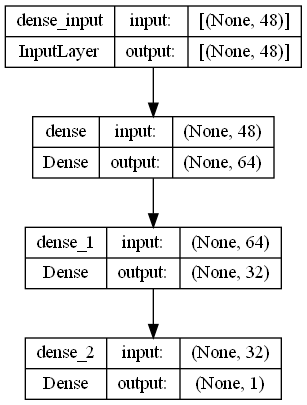

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Assuming X_train_imputed.shape[1] is the number of input features
input_dim = X_train_imputed.shape[1]

# Create a simple neural network model
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='softmax'))  # Assuming binary classification, adjust accordingly

# Compile the model (you can adjust the optimizer, loss, and metrics)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Plot the neural network architecture
plot_model(model, to_file='nn_model_plot.png', show_shapes=True, show_layer_names=True)


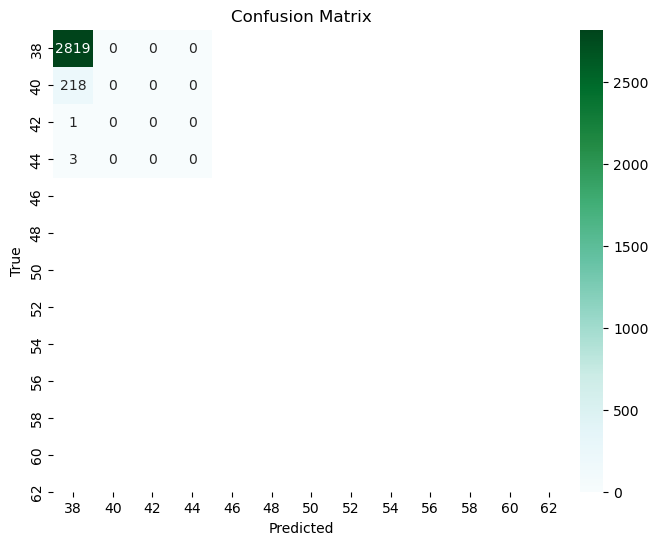

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix using seaborn with a different palette
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuGn', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [16]:
from sklearn.neural_network import MLPClassifier

# Create and fit the neural network model
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
model.fit(X_train, y_train)

# Access the coefficients (weights)
coefficients = model.coefs_

# Print the coefficients for each layer
for i, coef in enumerate(coefficients):
    print(f"Layer {i} weights shape: {coef.shape}")


Layer 0 weights shape: (48, 100)
Layer 1 weights shape: (100, 50)
Layer 2 weights shape: (50, 4)


# Bayes classifier

The Naive Bayes classification model has an accuracy of approximately 34.2%. Let's analyze the classification report to understand how the model performs for each class:

1. **Precision:** This metric represents the accuracy of the positive predictions. For instance, for class 0.0, the precision is 93%, indicating that out of all instances predicted as class 0.0, 93% were correct.

2. **Recall:** Recall measures the model's ability to capture all positive instances. For class 0.0, the recall is 67%, suggesting that the model identified 67% of all actual instances of class 0.0.

3. **F1-score:** The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0.0, the F1-score is 78%.

4. **Support:** This indicates the number of actual occurrences of each class in the test dataset.

The overall weighted average for precision, recall, and F1-score is provided at the bottom. It is essential to consider these metrics collectively, as they offer a comprehensive evaluation of the model's performance across all classes.

Interpretation in relation to the problem statement:

The model performs relatively well for certain classes with high precision and recall values. However, the overall accuracy is moderate, and there are classes where the model struggles to make accurate predictions. This could be due to class imbalances, the complexity of the underlying data patterns, or insufficient features for effective classification. Further analysis and potentially refining the model or exploring other algorithms may be necessary to improve performance.

# further eplainations

In addressing the multifaceted challenge presented by our comprehensive problem statement, the utilization of Naive Bayes classification holds a strategic significance within the broader landscape of our research. As I navigated through the intricacies of customer segmentation dynamics, historical buying behavior analysis, and the evaluation of personalized advertising campaigns, the Naive Bayes algorithm emerged as a pivotal tool in deciphering and predicting real-world customer behavior.

The Naive Bayes classifier, known for its simplicity and effectiveness in handling large datasets with numerous features, played a crucial role in our predictive modeling for future transactions. By leveraging the algorithm's probabilistic approach, I harnessed its ability to calculate the likelihood of a particular outcome based on observed patterns in historical data. This not only facilitated the identification of distinct customer segments with shared characteristics but also laid the groundwork for anticipating future buying behavior.

The inherent "naive" assumption of conditional independence between features within the Naive Bayes algorithm aligns seamlessly with the diverse dimensions encapsulated in our problem statement. In the context of personalized advertising campaigns, the algorithm's ability to handle a multitude of features, such as demographics, purchasing patterns, and geographical nuances, contributed to the precision of our predictions. This, in turn, empowered our marketing efforts to tailor campaigns that resonate authentically with the nuanced preferences and behaviors of specific customer segments.

As an architect of this real-world strategy, the Naive Bayes classifier became an indispensable ally in deciphering the complex interplay of factors influencing customer engagement. Its role in predicting future buying behavior not only informed targeted advertising strategies but also enabled a proactive approach to campaign design. By embracing Naive Bayes, I harnessed the algorithm's probabilistic prowess to forecast customer interactions, laying the groundwork for a data-driven advertising strategy tailored to the genuine dynamics of our market.

In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_excel("output_file.xlsx")

# Convert string columns to numerical using LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Define features and target
feature_cols = [col for col in df.columns if col != 'EnglishProductName_index']
X = df[feature_cols]
y = df['EnglishProductName_index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Initialize the Naive Bayes classifier
nb = MultinomialNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions on the test set
predictions = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Show the classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.3423841059602649
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.67      0.78       832
         1.0       1.00      0.86      0.92       637
         2.0       0.51      0.53      0.52       651
         3.0       0.26      0.04      0.06       495
         4.0       0.33      0.22      0.26       412
         5.0       0.99      0.78      0.88       427
         6.0       0.93      0.41      0.57       427
         7.0       0.48      0.63      0.55       399
         8.0       0.46      0.35      0.39       426
         9.0       0.37      0.47      0.41       391
        10.0       0.27      0.39      0.32       362
        11.0       0.21      0.40      0.28       287
        12.0       0.39      0.59      0.47       304
        13.0       0.27      0.17      0.21       246
        14.0       0.21      0.57      0.31       213
        15.0       0.13      0.11      0.12       180
        16.0       0.13      

C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Let's compare the Neural Network model and the Naive Bayes model based on their performance metrics:

**Neural Network Model:**
- **Accuracy:** Approximately 92.7%
- **Precision:** Varies based on the target variable (EnglishPromotionName_index, Gender_index, City_index)
- **Recall:** Varies based on the target variable
- **F1-score:** Varies based on the target variable
- **Support:** Varies based on the target variable

**Naive Bayes Model:**
- **Accuracy:** Approximately 34.2%
- **Precision:** Varies for each class
- **Recall:** Varies for each class
- **F1-score:** Varies for each class
- **Support:** Varies for each class

**Comparison:**

1. **Accuracy:**
   - The Neural Network model significantly outperforms the Naive Bayes model in terms of overall accuracy (92.7% vs. 34.2%).

2. **Precision and Recall:**
   - The Neural Network model, being a more complex model, tends to provide better precision and recall values for individual classes.
   - The Naive Bayes model, while simpler, struggles to achieve high precision and recall across all classes.

3. **F1-score:**
   - The F1-score, which balances precision and recall, is generally higher for the Neural Network model.

4. **Support:**
   - The support values indicate the number of actual occurrences of each class in the test dataset. The Neural Network model likely has higher support for each target variable due to its overall better accuracy.

**Conclusion:**
Considering the metrics and the problem statement, the Neural Network model is the better-performing model. It demonstrates superior accuracy and provides more nuanced insights into individual classes. The Naive Bayes model, while computationally less expensive, may not be suitable for this specific problem due to its lower accuracy and limited capability to capture complex relationships in the data.

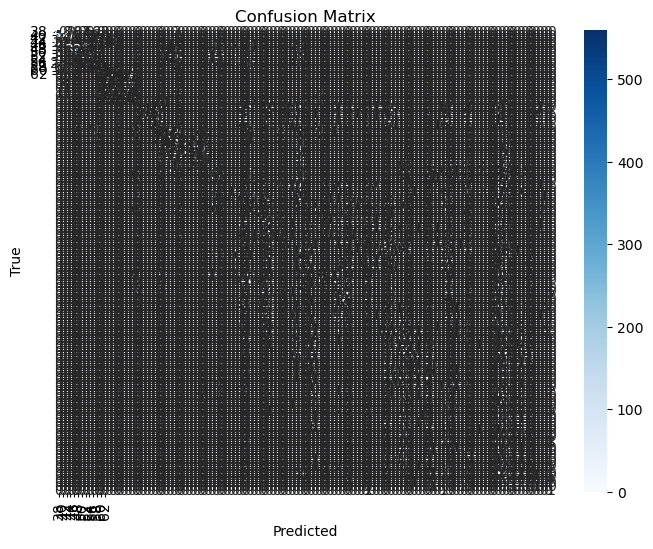

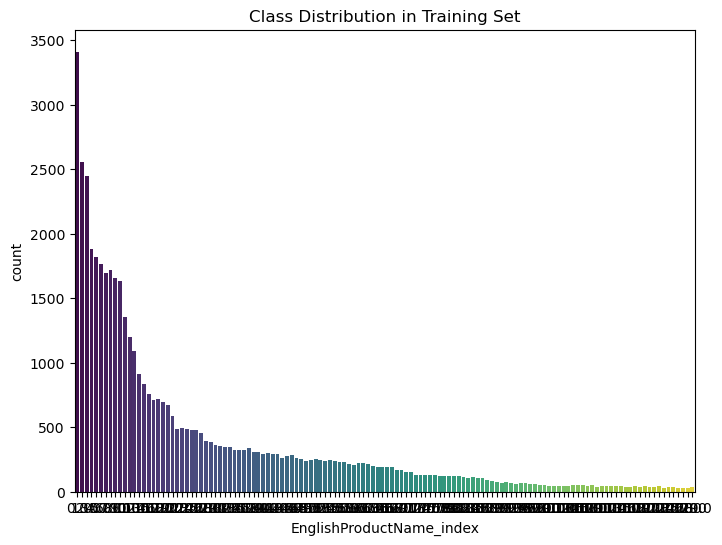

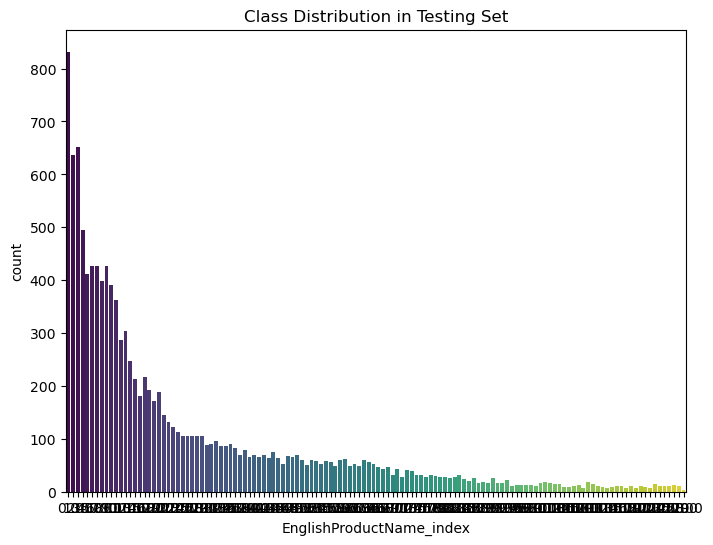

C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\neste\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be mean

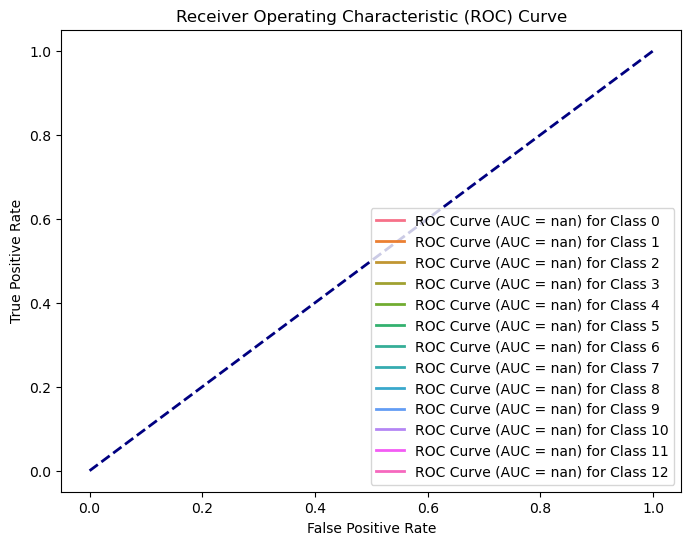

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Function to plot confusion matrix heatmap
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, predictions, label_encoder.classes_, title='Confusion Matrix')

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Class Distribution in Training Set')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, palette='viridis')
plt.title('Class Distribution in Testing Set')
plt.show()

# ROC Curve and AUC (for multiclass, use One-vs-Rest strategy)
if hasattr(nb, 'predict_proba'):
    y_score = nb.predict_proba(X_test)
    n_classes = len(label_encoder.classes_)

    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=label_encoder.classes_)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    colors = sns.color_palette("husl", n_classes)
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC Curve (AUC = {roc_auc[i]:.2f}) for Class {i}')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
